# STAT3612 Lecture 3 - 	Generalized Linear Models

[Dr. Aijun Zhang](http://www.statsoft.org) - [STAT3622 Data Visualization](http://www.statsoft.org/teaching/stat3622/)

28 January 2019

In [1]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X = iris.data[:,[0,1,2]]
y = iris.data[:,3]

In [2]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, y)
print('Intercept:', lm.intercept_)
print('Coefficients:', lm.coef_)

Intercept: -0.24872358602445543
Coefficients: [-0.21027133  0.22877721  0.52608818]


In [3]:
import statsmodels.api as sm

X1 = sm.add_constant(X)
lm2 = sm.OLS(y,X1)
result = lm2.fit() 
result.params

array([-0.24872359, -0.21027133,  0.22877721,  0.52608818])

In [4]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     736.9
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           6.20e-88
Time:                        17:24:48   Log-Likelihood:                 36.809
No. Observations:                 150   AIC:                            -65.62
Df Residuals:                     146   BIC:                            -53.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2487      0.178     -1.396      0.1

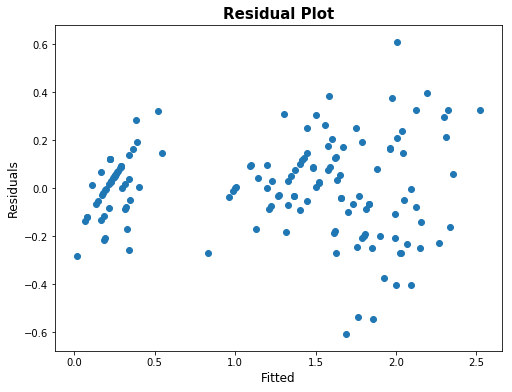

In [5]:
import matplotlib.pyplot as plt

yhat = lm.predict(X)

plt.figure(1, figsize=(8, 6))
plt.scatter(yhat, yhat-y)
plt.xlabel('Fitted', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot',fontsize=15, fontweight="bold")
plt.show()